In [4]:
!wget https://github.com/benmsanderson/tutorial/blob/main/gcp_a_data.csv
!wget https://github.com/benmsanderson/tutorial/blob/main/Gjennomsnittsfart_Kristiansand_30sone.txt

fatal: destination path 'tutorial' already exists and is not an empty directory.


# Exercise solutions python tutorial

Bear in mind, all these solutions are just suggestions, there are a multitude of different ways of doing things, and there is no reason to think your solution isn't just as good if not better.

## Exercise set 1

### Problem 1
Problem 1 from project Euler: If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23. Find the sum of all the multiples of 3 or 5 below 1000. Can you do it without using a loop?

### Solution suggestion
Below is a demonstration of a solution using a for-loop, and then a solution without looping using numpy:

In [1]:
s = 0
for i in range(1000):
    if i%3 == 0 or i%5 == 0:
        s = s + i
print(f" Brute force solution: {s}")

import numpy as np
s = np.sum(np.arange(3,1000,3)) + np.sum(np.arange(5,1000,5)) - np.sum(np.arange(15,1000,15))
print(f" Numpy solution: {s}")

 Brute force solution: 233168
 Numpy solution: 233168


### Problem 2
Write a function that takes in a dictionary and a key and either displays the value for that key, or prints out a message stating that the key is not in the dictionary

In [2]:
def check_key_in_dict(d, k):
    if k in d:
        print(f"The value of the dictionary for key {k} is {d[k]}")
    else:
        print(f"The key {k} is not in the dictionary")
test_dict = {"a working key":"an open door", "another key":"who knows what it opens?", "key3":45, "4":"bathroom"}
check_key_in_dict(test_dict, "4")
check_key_in_dict(test_dict, "lost key")

The value of the dictionary for key 4 is bathroom
The key lost key is not in the dictionary


### Problem 3
Use numpy to load the file “Gjennomsnittsfart_Kristiandand_30sone” and compute the mean, maximum and minimum velocities. The velocities are listed in km/h, make another array containing the velocities in m/s, sort the values in this array and find the median.

In [7]:
speeds = np.loadtxt("Gjennomsnittsfart_Kristiansand_30sone.txt")
print(f"Mean: {np.mean(speeds)}, max: {np.max(speeds)}, min: {np.min(speeds)}")
speeds_ms = np.sort(speeds/3.6)
if len(speeds)%2==0:
    med_calc = (speeds_ms[len(speeds)//2]+speeds_ms[len(speeds)//2 -1])/2
else:
    med_calc = speeds_ms[len(speeds)//2]
print(f"Median from middle of sorted list {med_calc} or directly {np.median(speeds_ms)}")

Mean: 27.87838827838828, max: 51.0, min: 16.0
Median from middle of sorted list 7.5 or directly 7.5


## Exercise set 2

### Problem 1
Use the file with global carbon project data (gcp_a_data.csv), read it in and print the column headers

In [25]:
import pandas as pd

df_gcp = pd.read_csv("gcp_a_data.csv")
print(df_gcp.columns)

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')
The carbon Emissions for Cement for Albania in 1994 was: 0.040304
              Year       Total        Coal         Oil         Gas  \
count   265.000000  265.000000  265.000000  265.000000  265.000000   
mean   1975.305660   19.115030    0.920070    7.080606    7.922292   
std      27.258321   37.569234    1.216296   12.822320   19.235187   
min    1916.000000    0.003664    0.000000    0.000000    0.000000   
25%    1954.000000    0.743792    0.076197    0.461664    0.000000   
50%    1976.000000    2.975168    0.388384    1.850320    0.198147   
75%    1998.000000    7.818976    1.381328    4.145807    0.699376   
max    2020.000000  166.641950    7.530906   56.759097   92.436302   

           Cement     Flaring  Other  Per Capita  Fossil_fuel_sum  
count  253.000000  265.000000    0.0  213.000000       265.000000  
mean     0.993

### Problem 2
Find the value for Cement for Albania for 1994

In [26]:
Albania = df_gcp[df_gcp['Country']=='Albania']
print(f"The carbon Emissions for Cement for Albania in 1994 was: {Albania[Albania['Year']==1994]['Cement'].get_values()[0]}")

The carbon Emissions for Cement for Albania in 1994 was: 0.040304


### Problem 3
Make a new sum that gives total for fossil fuel burning

In [27]:
df_gcp["Fossil_fuel_sum"] = df_gcp['Coal'] + df_gcp['Oil'] + df_gcp['Gas']
print(df_gcp.describe())

              Year       Total        Coal         Oil         Gas  \
count   265.000000  265.000000  265.000000  265.000000  265.000000   
mean   1975.305660   19.115030    0.920070    7.080606    7.922292   
std      27.258321   37.569234    1.216296   12.822320   19.235187   
min    1916.000000    0.003664    0.000000    0.000000    0.000000   
25%    1954.000000    0.743792    0.076197    0.461664    0.000000   
50%    1976.000000    2.975168    0.388384    1.850320    0.198147   
75%    1998.000000    7.818976    1.381328    4.145807    0.699376   
max    2020.000000  166.641950    7.530906   56.759097   92.436302   

           Cement     Flaring  Other  Per Capita  Fossil_fuel_sum  
count  253.000000  265.000000    0.0  213.000000       265.000000  
mean     0.993180    2.243856    NaN    1.296110        15.922968  
std      2.183289    5.044367    NaN    1.205703        32.238249  
min      0.000000    0.000000    NaN    0.010871         0.003664  
25%      0.031825    0.000000

### Problem 4 
Find the mean max and min values for carbon for each of the three countries and the years in which they occurred.

In [28]:
print("Country maximum total emissions")
for country in df_gcp.Country.unique():
    sub_df = df_gcp[df_gcp['Country']==country]
    max_val = sub_df['Total'].max()
    max_year = sub_df[sub_df['Total'] == max_val]['Year'].get_values()[0]
    print(f"Maximum carbon emisssion in {country} was {max_val} and occured in {max_year}")

Country maximum total emissions
Maximum carbon emisssion in Afghanistan was 12.160286 and occured in 2020
Maximum carbon emisssion in Albania was 8.9768 and occured in 1989
Maximum carbon emisssion in Algeria was 166.64195 and occured in 2019


## Exercise set 3 

### Problem 1
Make a histogram plot from the  speeding data

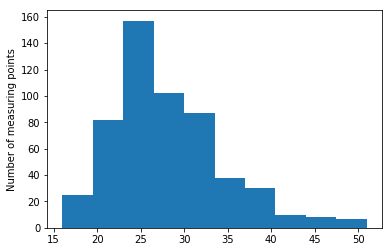

In [30]:
import matplotlib.pyplot as plt
#This line here is just so the figure will show in the notebook:
%matplotlib inline
plt.hist(speeds)
plt.xlabel="Speed (km/h)"
plt.ylabel("Number of measuring points")
plt.show()

### Problem 2, 3 and 4
2. Make line plots of evolution of carbon emissions per source, add a legend and make meaningful color choices
3. Add the mean between sources to the previous plot
4. Repeat the above, but make subplots per country, make the axis equal for all the plots

<Figure size 1440x720 with 0 Axes>

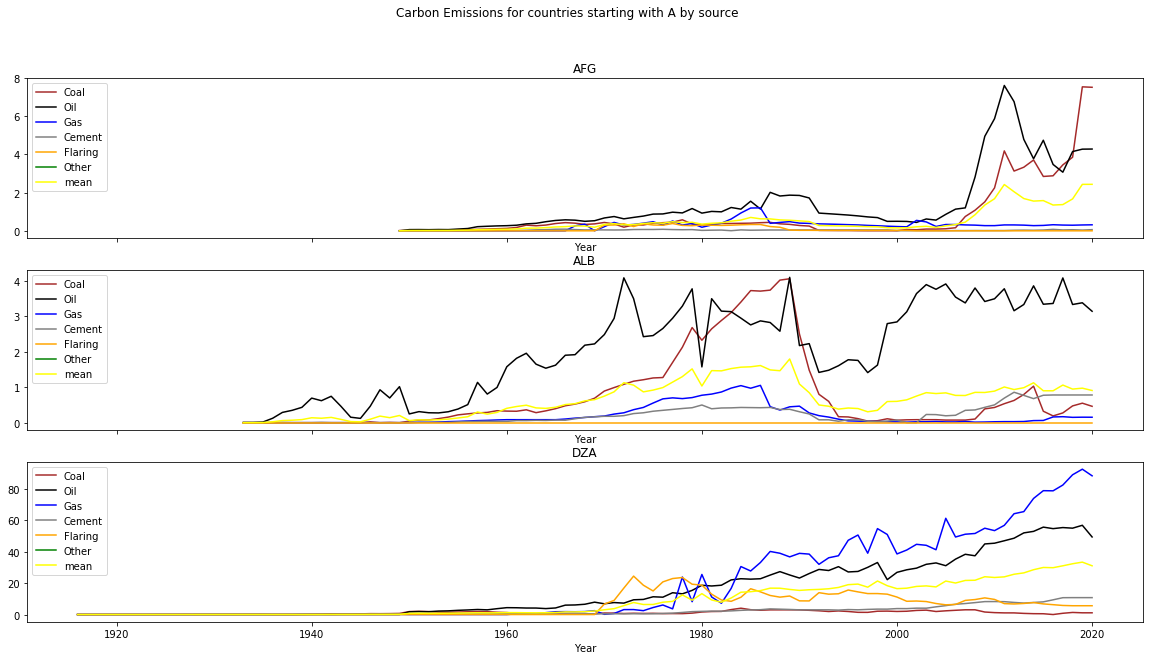

In [40]:
sources = {'Coal':'brown', 'Oil':'black', 'Gas':'blue', 'Cement':'grey', 'Flaring':'orange', 'Other':'green', 'mean':'yellow'}
df_gcp['mean'] = df_gcp[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].mean(axis=1)
plt.clf()
#Making plot bigger:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots(3, sharey=False, sharex=True)
countries = ["AFG", "ALB", "DZA"]
for i,c in enumerate(countries):
    c_data = df_gcp[df_gcp["ISO 3166-1 alpha-3"]==c]
    for so in sources:
        ax[i].plot(c_data["Year"], c_data[so], label=so, color=sources[so])
    ax[i].set_title(c)
    ax[i].set_xlabel('Year')
    ax[i].legend()
  #ax[i].set_ylabel('Per Capita Carbon Emissions')
fig.suptitle("Carbon Emissions for countries starting with A by source")

#plt.tight_layout()
plt.show()


### Problem 5
Make a scatter plot of per Capita emissions for the three countries, with dot sizes decided by population size


<function matplotlib.pyplot.show(*args, **kw)>

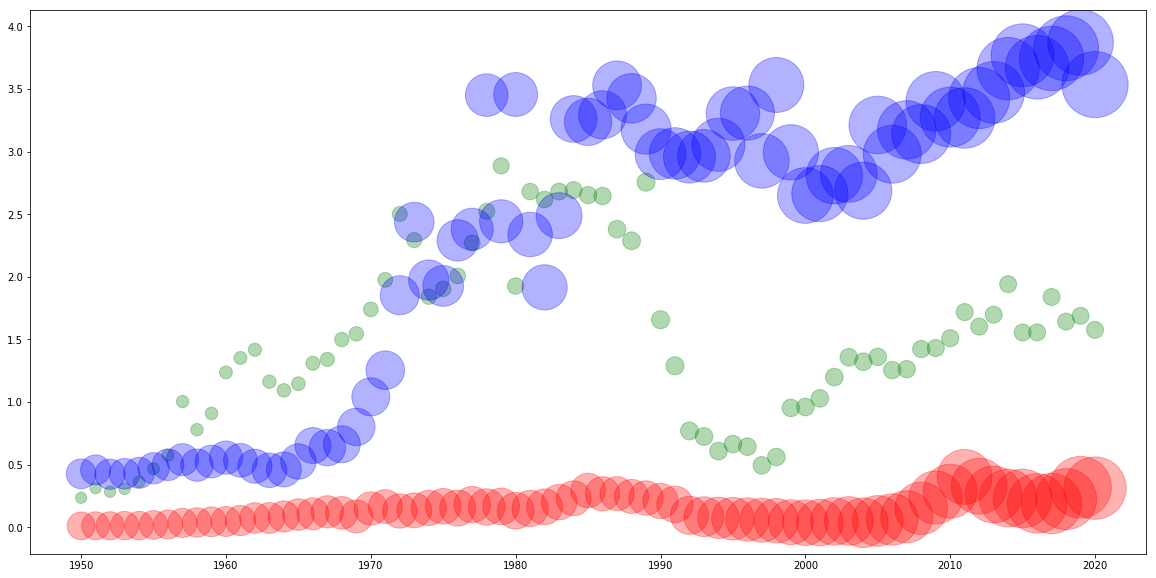

In [50]:
df_gcp['Population'] = df_gcp['Total']/df_gcp['Per Capita']
grouped = df_gcp.groupby('Country')
plt.clf()
colors = {'Afghanistan':'red', 'Albania':'green', 'Algeria':'blue'}
plt.scatter(df_gcp['Year'], df_gcp['Per Capita'], alpha=0.3, s=100*df_gcp['Population'],
            c= df_gcp['Country'].map(colors),
            cmap='viridis')

plt.show